In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pylab as plt

%matplotlib inline

working with tensors - https://pytormch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [9]:
# getting the dataset

In [13]:
# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transforms.ToTensor(), download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transforms.ToTensor(), download=True)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [16]:
img, label = training_set[0]

In [17]:
img.shape

torch.Size([1, 28, 28])

In [35]:
label

9

In [20]:
# show an image

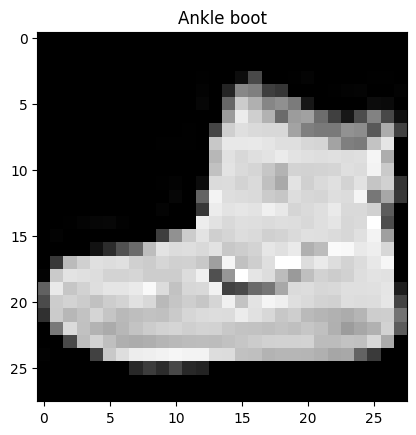

In [36]:
plt.figure()
plt.title(training_set.classes[label])
plt.imshow(img.squeeze(), cmap="gray")

## convolutional layer

In [58]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding="same", bias=True)

In [59]:
conv_layer

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [60]:
for name, param in conv_layer.named_parameters():
    print(name)
    print(param[0].detach())

weight
tensor([[[ 0.2848,  0.2756,  0.1534],
         [-0.2168, -0.2112,  0.0999],
         [ 0.1743,  0.0663, -0.1300]]])
bias
tensor(0.1167)


In [61]:
conv_layer.weight

Parameter containing:
tensor([[[[ 0.2848,  0.2756,  0.1534],
          [-0.2168, -0.2112,  0.0999],
          [ 0.1743,  0.0663, -0.1300]]]], requires_grad=True)

In [62]:
conv_layer.bias

Parameter containing:
tensor([0.1167], requires_grad=True)

In [38]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0071,  0.3243,  0.0457],
                        [-0.1384, -0.0075,  0.1410],
                        [-0.3149, -0.0239, -0.2038]]]]))])

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from matplotlib import pyplot as plt

# Load grayscale cat image
cat = TF.to_tensor(TF.rgb_to_grayscale(TF.decode_png('cat.png'))).unsqueeze(0).unsqueeze(0)

# Define a convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Initialize the weights of the convolutional kernel
conv_layer.state_dict()['weight'][0][0] = torch.tensor([[0., 1., 0.], 
                                                         [1., -4., 1.],
                                                         [0., 1., 0.]])

# Perform convolution
edges = conv_layer(cat)

# Visualize input and output
plt.subplot(1,2,1)
plt.imshow(cat[0,0], cmap='gray')
plt.title('Original')

plt.subplot(1,2,2)
plt.imshow(edges[0,0], cmap='gray')
plt.title('Edges')
plt.show()

AttributeError: module 'torchvision.transforms.functional' has no attribute 'decode_png'